In [18]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [13]:
# Generate a simple sequential dataset
def generate_sequence_data(seq_length, num_sequences):
    X = []
    y = []
    for _ in range(num_sequences):
        start = np.random.randint(0, 100)
        sequence = np.arange(start, start + seq_length + 1)
        X.append(sequence[:-1])
        y.append(sequence[-1])
    X = np.array(X)
    y = np.array(y)
    return X, y

In [14]:
# Generate data
seq_length = 10
num_sequences = 1000
X, y = generate_sequence_data(seq_length, num_sequences)


In [15]:
# Reshape X to be suitable for RNN input: (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

In [16]:
# Split data into train and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [19]:
# Build the RNN model
model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])

In [20]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [21]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 1651.9384 - val_loss: 169.7568
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 57.0355 - val_loss: 7.5891
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.0310 - val_loss: 2.9345
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.6252 - val_loss: 2.7271
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.3053 - val_loss: 2.5038
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.9195 - val_loss: 2.1728
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.5185 - val_loss: 1.7938
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.1373 - val_loss: 1.4900
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.7133 - val_loss: 1.1968
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4655 - val_loss: 0.9161
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9396 - val_loss: 0.7561
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7310 -

In [22]:
# Evaluate the model on test data
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0114 
Test Loss: 0.013562096282839775


In [23]:
# Make predictions
y_pred = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


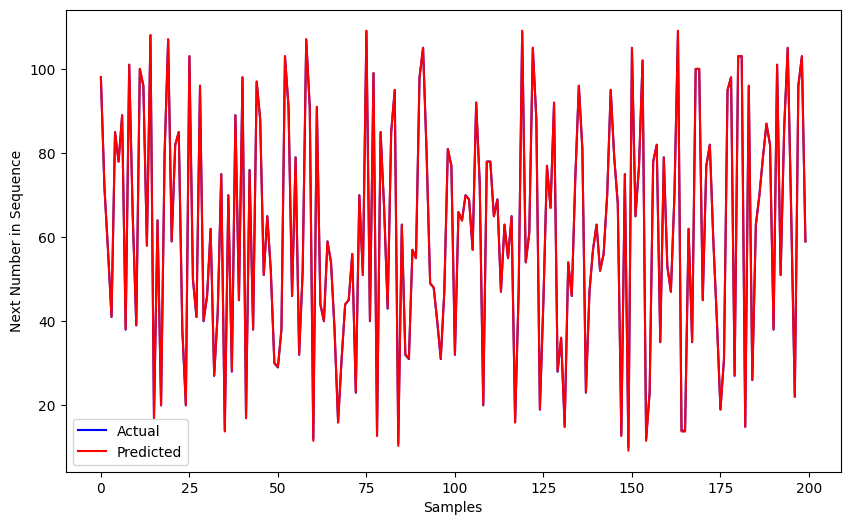

In [24]:
# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red')
plt.xlabel('Samples')
plt.ylabel('Next Number in Sequence')
plt.legend()
plt.show()